In [ ]:
import pandas as pd
file_path = '/content/kddcup.data_10_percent_corrected'
df = pd.read_csv(file_path, header=None, sep=',')
print(df.shape)

(494021, 42)


Insert the header

In [ ]:
column_names = [
    'duration', 'protocol_type', 'service', 'flag',
    'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'target'
]
df = pd.read_csv(file_path, header=None, names=column_names)

In [ ]:
df.columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


Handle the Missing values

In [ ]:
df_miss = df.isnull().sum()
print(df_miss)

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
import pandas as pd
column_means = df.mean()
df_filled = df.fillna(column_means)
print(df_filled.isnull().sum())

<ipython-input-5-9ede98f792fb>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Handle duplicated rows

In [ ]:
duplicate_rows = df.duplicated()
print(duplicate_rows)

0         False
1         False
2         False
3         False
4         False
          ...  
494016    False
494017    False
494018    False
494019    False
494020    False
Length: 494021, dtype: bool


Categorical features

In [ ]:
import pandas as pd
print(df.dtypes)
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:")
print(categorical_features)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Target Visualization

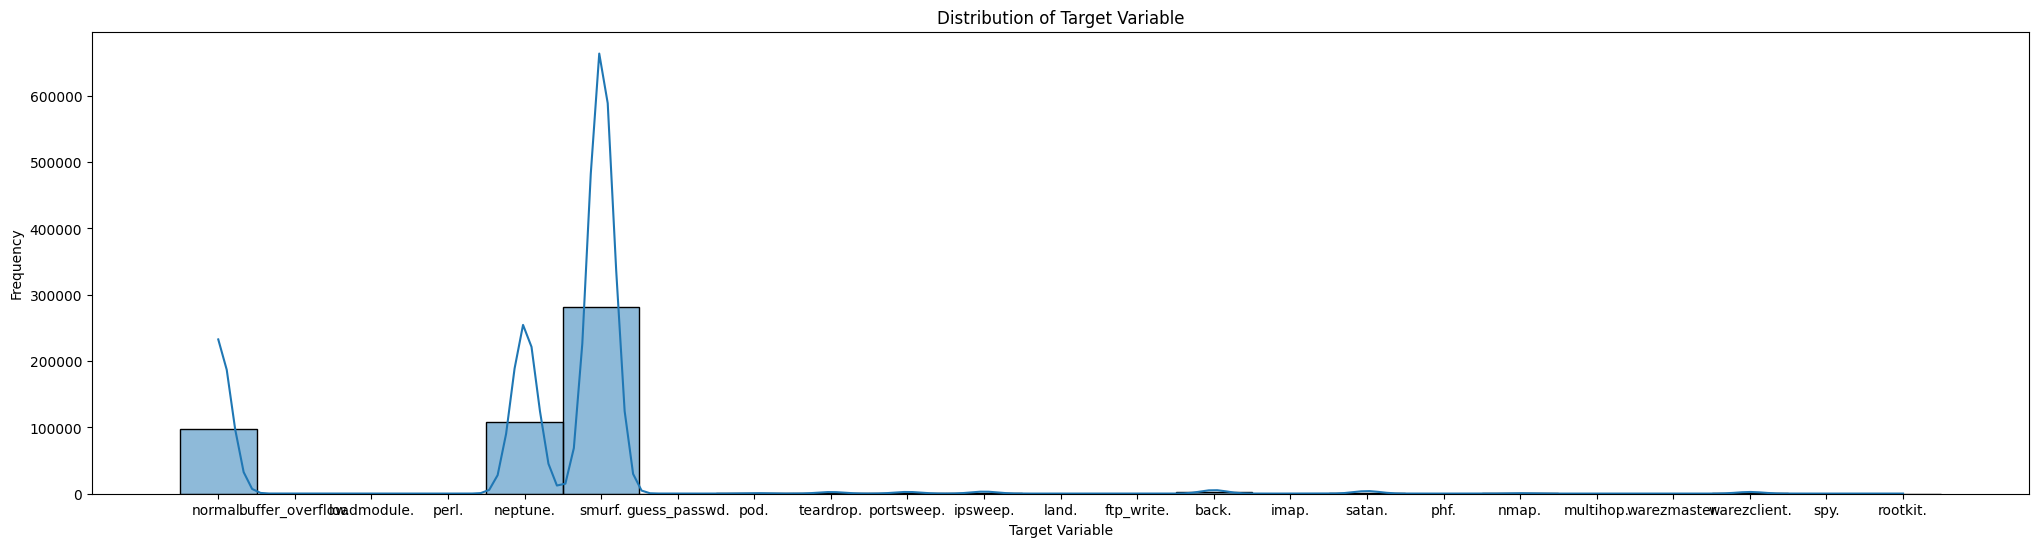

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25, 6))
sns.histplot(data=df.iloc[:, -1], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

Feature mapping

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_filled['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df_filled['service'] = label_encoder.fit_transform(df['service'])
df_filled['flag'] = label_encoder.fit_transform(df['flag'])
print(df_filled.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       22     9        181       5450     0   
1         0              1       22     9        239        486     0   
2         0              1       22     9        235       1337     0   
3         0              1       22     9        219       1337     0   
4         0              1       22     9        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0

Bar chart for categorical features

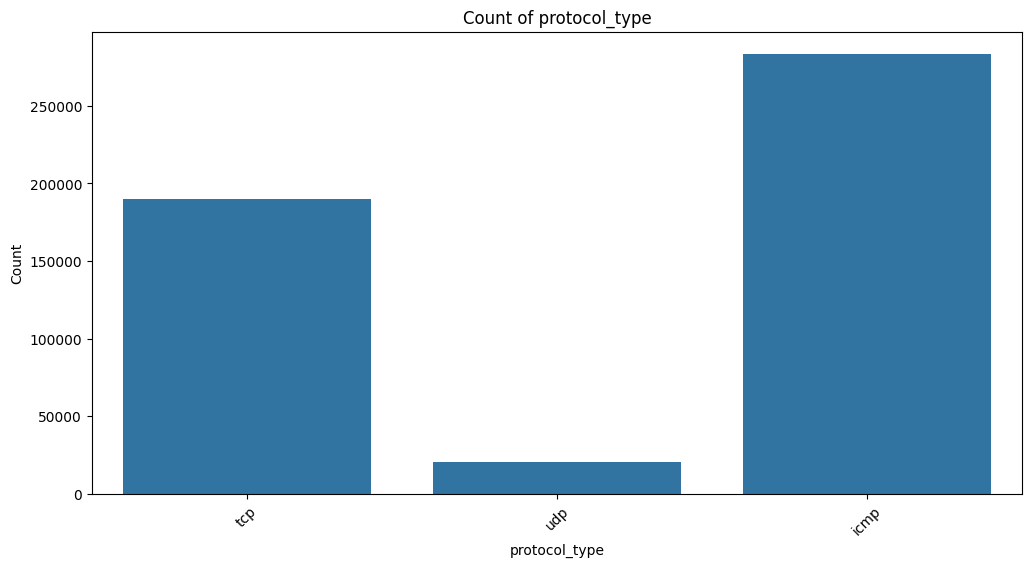

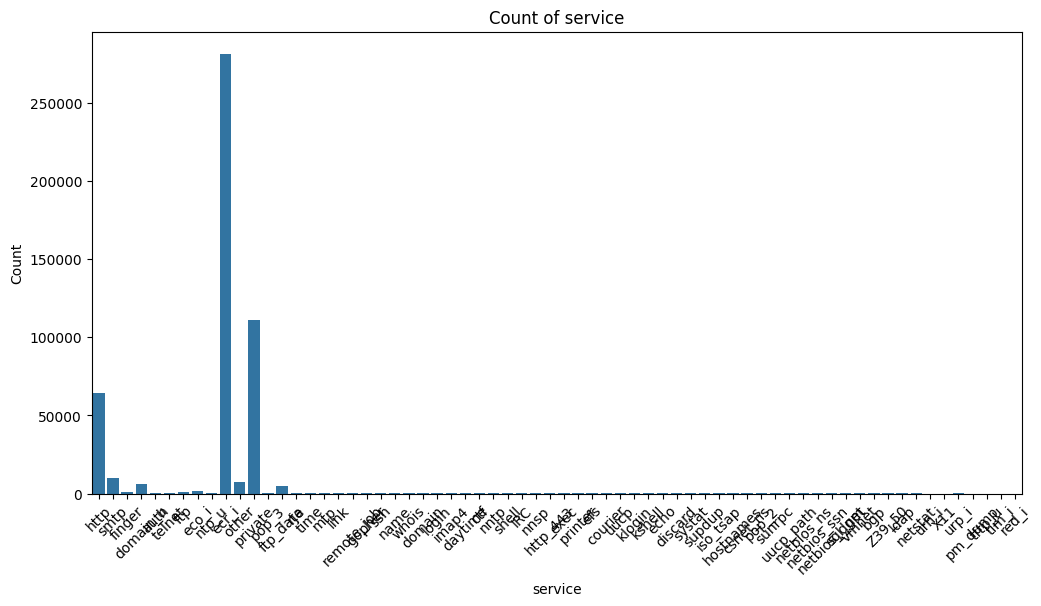

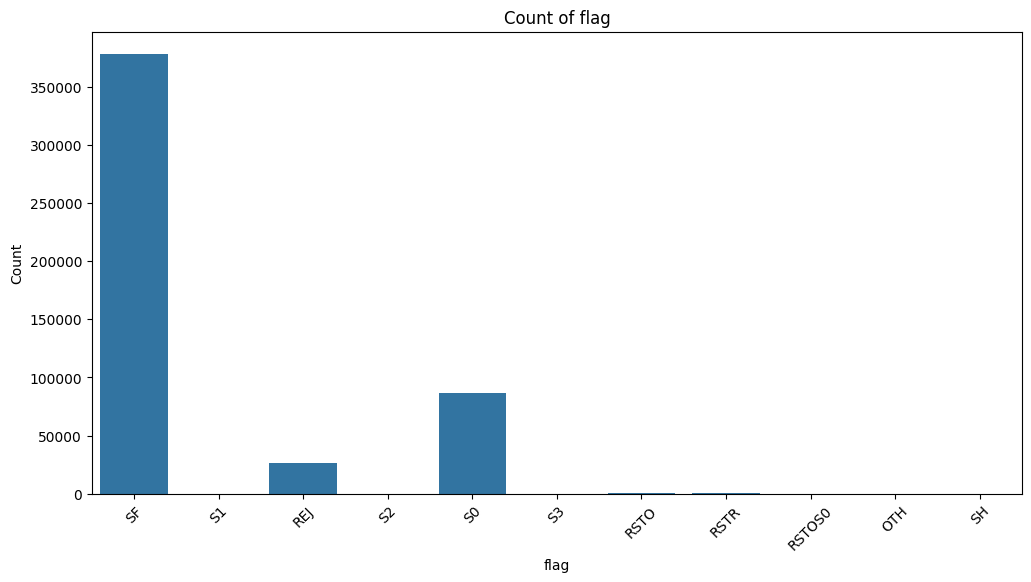

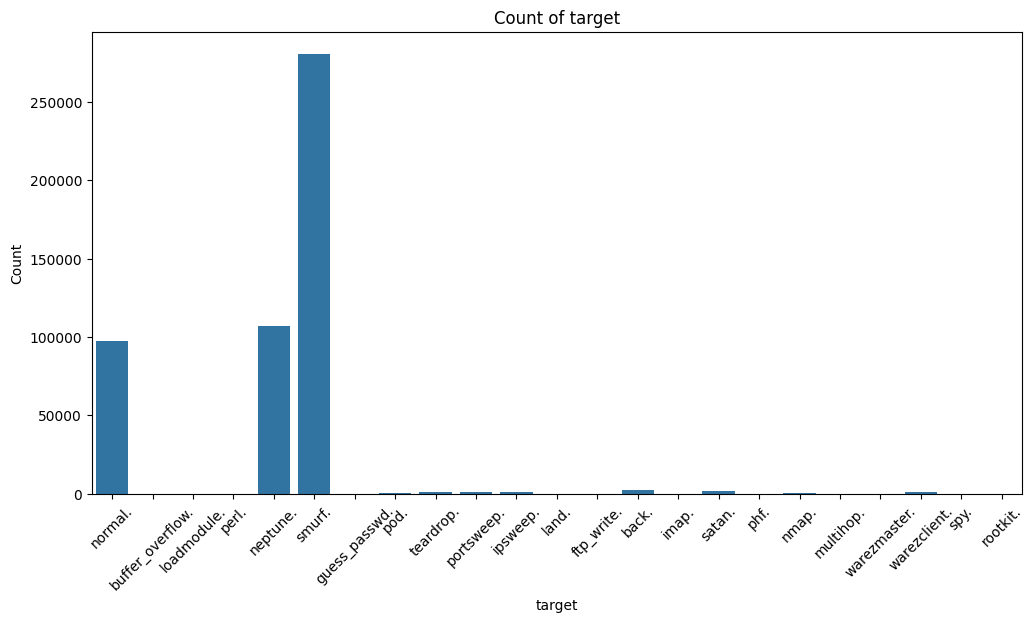

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=df)
    plt.title('Count of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Add location and devices columns

In [ ]:
df['location'] = ''
df['devices'] = ''

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,location,devices
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,,
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,,
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,,
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,,
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,,


In [ ]:

import numpy as np
regions = ['region 1', 'region 2', 'region 3', 'region 4', 'region 5',
           'region 6', 'region 7', 'region 8', 'region 9', 'region 10']

df['location'] = np.random.choice(regions, size=len(df))

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,location,devices
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,region 10,
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,region 5,
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,region 5,
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,region 8,
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,region 9,


In [ ]:
df['devices'] = ''
devices = ['router', 'gateway', 'rj45', 'hub', 'switch']
df['devices'] = np.random.choice(devices, size=len(df))

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,location,devices
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,region 10,rj45
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,region 5,router
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,region 5,switch
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,region 8,router
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,region 9,switch


Removing irrelevant features

In [ ]:
feature_variances = df_filled.var()
variance_threshold = 0.05
irrelevant_features = feature_variances[feature_variances < variance_threshold].index.tolist()
print("Feature Variances:")
print(feature_variances)
print(irrelevant_features)
df_cleaned = df_filled.drop(columns=irrelevant_features)
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Feature Variances:
duration                       5.009051e+05
protocol_type                  3.313217e-01
service                        1.832864e+02
flag                           5.066341e+00
src_bytes                      9.765750e+11
dst_bytes                      1.091642e+09
land                           4.453063e-05
wrong_fragment                 1.817245e-02
urgent                         3.036294e-05
hot                            6.116844e-01
num_failed_logins              2.408579e-04
logged_in                      1.262699e-01
num_compromised                3.233977e+00
root_shell                     1.113191e-04
su_attempted                   6.072496e-05
num_root                       4.051035e+00
num_file_creations             9.296022e-03
num_shells                     1.214406e-04
num_access_files               1.330914e-03
num_outbound_cmds              0.000000e+00
is_host_login                  0.000000e+00
is_guest_login                 1.384661e-03
count        

<ipython-input-17-cc960db5990f>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_variances = df_filled.var()


Finding outliers

In [ ]:
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

outliers = (df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))
outliers_count_before = outliers.sum()
print("Outliers count before adding 'location' and 'devices' columns:")
print(outliers_count_before)

<ipython-input-18-b807f9557b4d>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_cleaned.quantile(0.25)
<ipython-input-18-b807f9557b4d>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_cleaned.quantile(0.75)
<ipython-input-18-b807f9557b4d>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))


Outliers count before adding 'location' and 'devices' columns:
count                               0
dst_bytes                       85763
dst_host_count                  61192
dst_host_rerror_rate            35229
dst_host_same_src_port_rate         0
dst_host_same_srv_rate              0
dst_host_serror_rate            94211
dst_host_srv_count                  0
dst_host_srv_rerror_rate        34216
dst_host_srv_serror_rate        93076
duration                        12350
flag                           115581
hot                              3192
logged_in                       73237
num_compromised                  2224
num_root                          585
protocol_type                       0
rerror_rate                     29073
same_srv_rate                  111942
serror_rate                     89234
service                             0
src_bytes                        4834
srv_count                           0
srv_rerror_rate                 29701
srv_serror_rate          

Correlation

<ipython-input-19-40fdd4291278>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


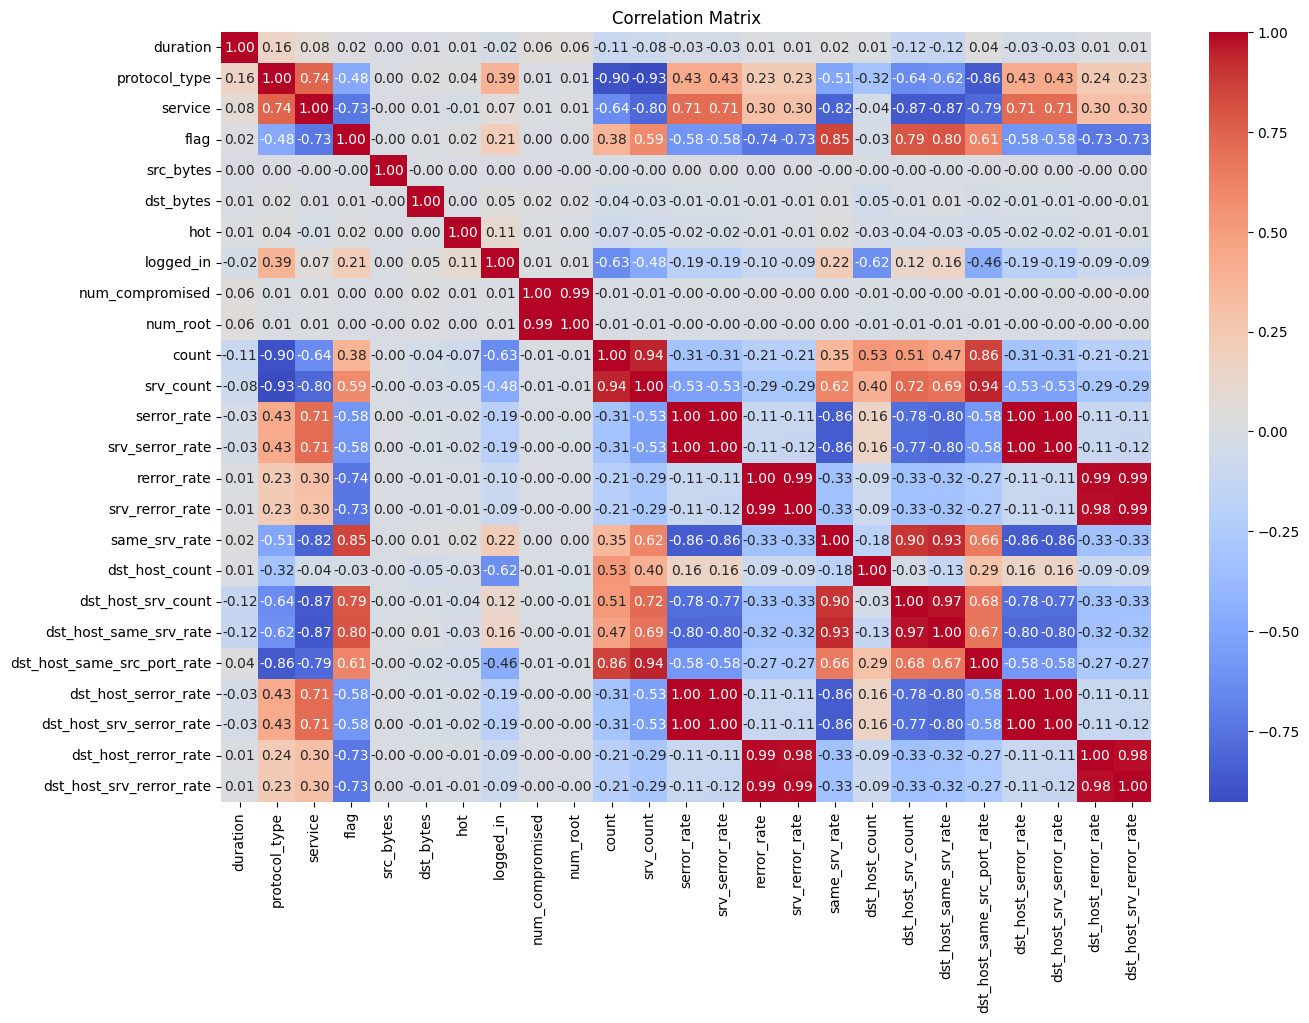

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Feature mapping for location and devices

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['location_encoded'] = label_encoder.fit_transform(df['location'])
df_cleaned['devices_encoded'] = label_encoder.fit_transform(df['devices'])
df_cleaned.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_root,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,location_encoded,devices_encoded
0,0,1,22,9,181,5450,0,1,0,0,...,9,1.0,0.11,0.0,0.0,0.0,0.0,normal.,1,2
1,0,1,22,9,239,486,0,1,0,0,...,19,1.0,0.05,0.0,0.0,0.0,0.0,normal.,5,3
2,0,1,22,9,235,1337,0,1,0,0,...,29,1.0,0.03,0.0,0.0,0.0,0.0,normal.,5,4
3,0,1,22,9,219,1337,0,1,0,0,...,39,1.0,0.03,0.0,0.0,0.0,0.0,normal.,8,3
4,0,1,22,9,217,2032,0,1,0,0,...,49,1.0,0.02,0.0,0.0,0.0,0.0,normal.,9,4


Correlation using Heat map

<ipython-input-21-40fdd4291278>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


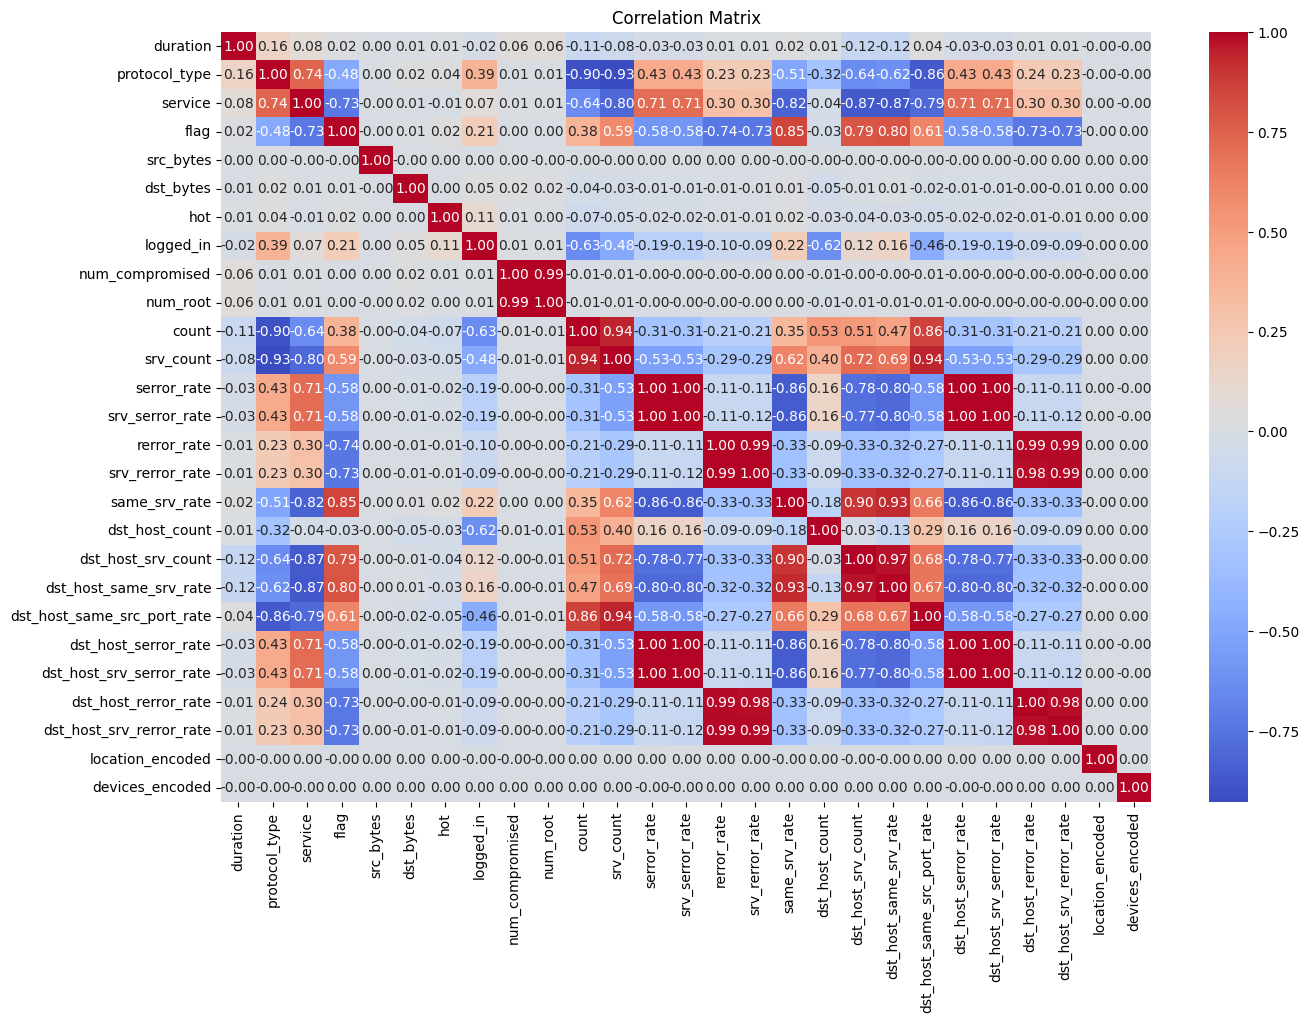

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Highly correlated variables

In [ ]:
import pandas as pd
corr_matrix = df_cleaned.corr()
threshold = 0.75

highly_correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

for pair in highly_correlated_pairs:
    print( pair[0], "and", pair[1], ":", pair[2])


<ipython-input-22-4453ec08df53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()


num_root and num_compromised : 0.9938277978737944
count and protocol_type : -0.9014670078591072
srv_count and protocol_type : -0.9274304859719373
srv_count and service : -0.7996131742907265
srv_count and count : 0.9436670688882699
srv_serror_rate and serror_rate : 0.9983615072725139
srv_rerror_rate and rerror_rate : 0.9947309539817971
same_srv_rate and service : -0.823668646564919
same_srv_rate and flag : 0.8525763505429016
same_srv_rate and serror_rate : -0.8582468732855145
same_srv_rate and srv_serror_rate : -0.8570596889766061
dst_host_srv_count and service : -0.866771052904035
dst_host_srv_count and flag : 0.7900406802371621
dst_host_srv_count and serror_rate : -0.7752726301373211
dst_host_srv_count and srv_serror_rate : -0.7741375553293743
dst_host_srv_count and same_srv_rate : 0.8989546630324124
dst_host_same_srv_rate and service : -0.8721104749287374
dst_host_same_srv_rate and flag : 0.7990545084179635
dst_host_same_srv_rate and serror_rate : -0.7999017709878755
dst_host_same_sr

Removing irrelevant features

In [ ]:
feature_variances = df_cleaned.var()
variance_threshold = 0.05
irrelevant_features = feature_variances[feature_variances < variance_threshold].index.tolist()
print("Feature Variances:")
print(feature_variances)
print("Irrelevant features:")
print(irrelevant_features)
df_cleaned = df_cleaned.drop(columns=irrelevant_features)
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Feature Variances:
duration                       5.009051e+05
protocol_type                  3.313217e-01
service                        1.832864e+02
flag                           5.066341e+00
src_bytes                      9.765750e+11
dst_bytes                      1.091642e+09
hot                            6.116844e-01
logged_in                      1.262699e-01
num_compromised                3.233977e+00
num_root                       4.051035e+00
count                          4.543182e+04
srv_count                      6.067493e+04
serror_rate                    1.449454e-01
srv_serror_rate                1.451736e-01
rerror_rate                    5.364943e-02
srv_rerror_rate                5.389222e-02
same_srv_rate                  1.506911e-01
dst_host_count                 4.191964e+03
dst_host_srv_count             1.124457e+04
dst_host_same_srv_rate         1.687410e-01
dst_host_same_src_port_rate    2.316586e-01
dst_host_serror_rate           1.448511e-01
dst_host_srv_

<ipython-input-23-b2f78850efb0>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_variances = df_cleaned.var()


Finding Outliers

In [ ]:
df_combined = pd.concat([df_cleaned, df[['location', 'devices']]], axis=1)
Q1 = df_combined.quantile(0.25)
Q3 = df_combined.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR
outliers = (df_combined < (Q1 - 1.5 * IQR)) | (df_combined > (Q3 + 1.5 * IQR))
outliers_count_after = outliers.sum()
print("Outliers count after adding 'location' and 'devices' columns:")
print(outliers_count_after)

<ipython-input-24-b2018a3a09f0>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_combined.quantile(0.25)
<ipython-input-24-b2018a3a09f0>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_combined.quantile(0.75)
<ipython-input-24-b2018a3a09f0>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df_combined < (Q1 - 1.5 * IQR)) | (df_combined > (Q3 + 1.5 * IQR))


Outliers count after adding 'location' and 'devices' columns:
count                               0
devices                             0
devices_encoded                     0
dst_bytes                       85763
dst_host_count                  61192
dst_host_rerror_rate            35229
dst_host_same_src_port_rate         0
dst_host_same_srv_rate              0
dst_host_serror_rate            94211
dst_host_srv_count                  0
dst_host_srv_rerror_rate        34216
dst_host_srv_serror_rate        93076
duration                        12350
flag                           115581
hot                              3192
location                            0
location_encoded                    0
logged_in                       73237
num_compromised                  2224
num_root                          585
protocol_type                       0
rerror_rate                     29073
same_srv_rate                  111942
serror_rate                     89234
service                   

Decision Tree

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score
X = df_cleaned.drop(['target', 'location_encoded', 'devices_encoded'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_train_time = time.time()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = dt_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time

print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Accuracy: 0.9994
Precision: 0.9994
Recall: 0.9994
F1-score: 0.9994
Training Time: 6.85 seconds
Testing Time: 0.06 seconds


Random forest

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score
X = df_cleaned.drop(['target', 'location_encoded', 'devices_encoded'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time()
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = rf_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Accuracy: 0.9995
Precision: 0.9994
Recall: 0.9995
F1-score: 0.9995
Training Time: 27.84 seconds
Testing Time: 1.79 seconds


Naive Bayes

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score
X = df_cleaned.drop(['target', 'location_encoded', 'devices_encoded'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time()
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = nb_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Accuracy: 0.9462
Precision: 0.9834
Recall: 0.9462
F1-score: 0.9608
Training Time: 1.16 seconds
Testing Time: 0.31 seconds


Logistic regression

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score

X = df_cleaned.drop(['target', 'location_encoded', 'devices_encoded'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time()
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = logreg_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9460
Precision: 0.9393
Recall: 0.9460
F1-score: 0.9391
Training Time: 88.30 seconds
Testing Time: 0.04 seconds


KNN

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score

X = df_cleaned.drop(['target', 'location_encoded', 'devices_encoded'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time()
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = knn_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")


Accuracy: 0.9985
Precision: 0.9984
Recall: 0.9985
F1-score: 0.9984
Training Time: 0.83 seconds
Testing Time: 252.84 seconds


Neural networks

In [ ]:
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score

X = df_cleaned.drop(['target', 'location_encoded', 'devices_encoded'], axis=1)
y = df_cleaned['target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_train_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
end_train_time = time.time()

start_test_time = time.time()
y_pred_probs = model.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")


Epoch 1/10
12351/12351 [==============================] - 26s 2ms/step - loss: 85.8407 - accuracy: 0.9790
Epoch 2/10
12351/12351 [==============================] - 27s 2ms/step - loss: 153.9404 - accuracy: 0.9893
Epoch 3/10
12351/12351 [==============================] - 29s 2ms/step - loss: 0.0397 - accuracy: 0.9941
Epoch 4/10
12351/12351 [==============================] - 31s 2ms/step - loss: 0.0763 - accuracy: 0.9918
Epoch 5/10
12351/12351 [==============================] - 27s 2ms/step - loss: 0.0532 - accuracy: 0.9920
Epoch 6/10
12351/12351 [==============================] - 25s 2ms/step - loss: 0.0357 - accuracy: 0.9922
Epoch 7/10
12351/12351 [==============================] - 25s 2ms/step - loss: 0.0319 - accuracy: 0.9926
Epoch 8/10
12351/12351 [==============================] - 26s 2ms/step - loss: 0.5038 - accuracy: 0.9929
Epoch 9/10
12351/12351 [==============================] - 29s 2ms/step - loss: 0.0292 - accuracy: 0.9928
Epoch 10/10
3088/3088 [=============================

After adding location and devices

Decision tree

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score
X = df_cleaned.drop(['target'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_train_time = time.time()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = dt_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time

print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Accuracy: 0.9994
Precision: 0.9995
Recall: 0.9994
F1-score: 0.9994
Training Time: 6.39 seconds
Testing Time: 0.03 seconds


Random Forest

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score
X = df_cleaned.drop(['target'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time()
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = rf_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1-score: 0.9995
Training Time: 48.24 seconds
Testing Time: 3.51 seconds


Naive Bayes

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score
X = df_cleaned.drop(['target'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time()
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = nb_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Accuracy: 0.9462
Precision: 0.9834
Recall: 0.9462
F1-score: 0.9608
Training Time: 1.21 seconds
Testing Time: 0.35 seconds


Logistic Regression

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score

X = df_cleaned.drop(['target'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time()
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = logreg_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9566
Precision: 0.9471
Recall: 0.9566
F1-score: 0.9495
Training Time: 137.81 seconds
Testing Time: 0.05 seconds


KNN

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score

X = df_cleaned.drop(['target'], axis=1)
y = df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time()
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = knn_classifier.predict(X_test)
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")


Accuracy: 0.9984
Precision: 0.9983
Recall: 0.9984
F1-score: 0.9983
Training Time: 0.88 seconds
Testing Time: 257.73 seconds


Neural networks

In [ ]:
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score ,recall_score , f1_score

X = df_cleaned.drop(['target'], axis=1)
y = df_cleaned['target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_train_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
end_train_time = time.time()

start_test_time = time.time()
y_pred_probs = model.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()
end_test_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

training_time = end_train_time - start_train_time
testing_time = end_test_time - start_test_time
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")


Epoch 1/10
12351/12351 [==============================] - 29s 2ms/step - loss: 628.6010 - accuracy: 0.9808
Epoch 2/10
12351/12351 [==============================] - 28s 2ms/step - loss: 389.5257 - accuracy: 0.9876
Epoch 3/10
12351/12351 [==============================] - 27s 2ms/step - loss: 371.9451 - accuracy: 0.9899
Epoch 4/10
12351/12351 [==============================] - 28s 2ms/step - loss: 105.2349 - accuracy: 0.9920
Epoch 5/10
12351/12351 [==============================] - 30s 2ms/step - loss: 223.1256 - accuracy: 0.9931
Epoch 6/10
12351/12351 [==============================] - 28s 2ms/step - loss: 144.7571 - accuracy: 0.9927
Epoch 7/10
12351/12351 [==============================] - 27s 2ms/step - loss: 109.0819 - accuracy: 0.9945
Epoch 8/10
12351/12351 [==============================] - 28s 2ms/step - loss: 52.4548 - accuracy: 0.9953
Epoch 9/10
12351/12351 [==============================] - 28s 2ms/step - loss: 8.5265 - accuracy: 0.9947
Epoch 10/10
3088/3088 [=================